# TWINKLE : THE SED GENERATOR

#### This tool, although a little rusty, will generate a stellar spectral energy distribution (SED) using empirical broad-band photometric data, fit to stellar models.

#### Right now, the two free parameters are the stellar radius and temperature. The gravity and metallicty are held fixed.

-----------

# 1. Input File Structure

## 1.1 JSON Parameter File

The program works by feeding it a JSON parameter file that contains the names of folders and files that will be used by the code, boolean values that will dictate some fit hacks, plot commands and which photometry from the input file that will be used. 

For instance, the example JSON file is located and titled $\textbf{./sed_paramfile.json}$

### 1.1.1 File set up:

In the JSON file, the "folders" section contains the following keys:

    > "topdir" - Top directory name.
    > "codedir" - directory under "topdir" that contains the code for twinkle.
    > "supportdir" - Directory where the empirical standard colors, stellar models, and response functions are kept.

and the "files" section contains the following keys:

    > "starfile" - The file that contains empirical stellar data (photometry, parallax, etc).
    > "bv_colorfile" - textfile that contains the empirical standard colors to use a reference.
    
If all the files and folders are located in a directory called $\textbf{stinfo_topdir}$, then the following files should be structured in the following way:
    
    > topdir/codedir/starfile
    > topdir/codedir/sed_paramfile.json
    > topdir/codedir/plot_sed.py
    > topdir/codedir/sed.py
    
    > topdir/codedir/supportdir/EMamajek_MSColors.txt
    > topdir/codedir/supportdir/Models/
    > topdir/codedir/supportdir/RSR/


### 1.1.2 Photometric Bands:

You can use the JSON file to indicate which photometric band data to use for different purposes. There are  six main keys which are lists. Each key is an array of strings, where each string entry is the identifier for a specific photometric band.

    > "mags2use0_original"
        - All the bands to include at ANY POINT in the calculation.

The rest are subsets of "mags2use0_original"

    > "mags4Phot0_original"
        - Bands that will be fit to the stellar model

    > "mags4scale0_original"
        - Bands that are used to calculate a first order constant to scale the raw model flux to observed         surface flux.

    > "scaleSEDbands"
        - Bands that will be used to re-scale the fitted photosphere. To be used with the boolean key "scalephot". 
    
    > "Remove_RedStars"

    > "mags4Dust0"
        - Bands at which to calculate the excess flux and eventually one or two blackbodies.


For example:
    > "mags2use0_original" : ["BJ","VJ","J2M","H2M","Ks2M","W1","W2","W3","W4","HPACS160_flux","HPACS100_flux"],
    
    Will incorporate the Johnson B,V, 2MASS J,H,Ks, and WISE W1,W2,W3,W4, and Herschel 100, 160  photometric bands. The suffix "_flux" indicates that the input data is flux in jansky and not in units of magnitude.
    
    
    > "mags4Phot0_original"  : ["BJ","VJ","J2M","H2M","Ks2M","W1","W2"],
    
    This indicates that only the Johnson B,V, 2MASS J,H,Ks, and WISE W1, W2 bands to use to fit the stellar photosphere. 

##### For all available filters, check out the $\textbf{/Docs/available_filters.txt}$ file

## 1.1 Stellar Photometric Data File

The text file listed as "topdir/codedir/starfile" contains information for all the stars for which you want to create an SED. Each row contains information for a single star, where a column is the meta data for that star.

The folder can be tab or space separated. 

The first row is the header. There are required and optional header names. They can be found in the file $\textbf{/Docs/Starfile_ColumnDescription.txt}$

You can add as many unique photometric columns as you wish. As described in the $\textbf{Starfile_ColumnDescription.txt}$, any column header key with the suffix $\_flux$, should be in units of Jy. Otherwise, it will be assumed the units are in magnitudes.

-----------

# 2. Running the Code

## 2.1 Set up

In [2]:
from __future__ import print_function
import sys, os
import json
import numpy as np
import matplotlib.pyplot as plt
from twinkle import twinkle

%load_ext autoreload
%autoreload 2

#### INITIATE INTERACTIVE MATPLOTLIB PLOTTING

##### If this doesn't work, change to "%matplotlib inline" and update both matplotlib and jupyter notebook to make nbagg backend to work

In [3]:
%matplotlib nbagg

## 2.2 Load JSON file
##### Change path to where you store your paramfile

In [4]:
jfile = os.path.join(os.path.expanduser('~'),'Dropbox','Research','twinkle','twinkle','sed_paramfile.json')
#jfile = 'Users/rpatel/sed_paramfile.json'

In [5]:
script = open(jfile).read()
specs = json.loads(script)

## 2.3  Select a star and feed JSON object into twinkle

In [6]:
# select a name in the stellar text file
# check out the example file "sample_stardata.txt" as an example
sname = 'Star_ID1'
tauA = twinkle.Star(jfile, starname=sname)
stoo = twinkle.STools

> /Users/rpatel/Dropbox (Personal)/Research/twinkle/twinkle/sed.py(1322)__init__()
-> workingdir = directories.WorkingDir(specs['folders']['topdir'])
(Pdb) c
-------------------------------
      Loading All Gridmodels   
Loaded NextGen of g=40, met=0
       Done Loading Models     
-------------------------------
Bands used to fit photosphere: [u'BJ' u'H2M' u'J2M' u'Ks2M' u'VJ' u'W1' u'W2']
Bands used to scale photosphere: [u'BJ' u'H2M' u'J2M' u'Ks2M' u'VJ']


twinkle/utils/mosaic_tools.py:4131: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(rr) != 2:
twinkle/sed.py:765: RuntimeWarning: divide by zero encountered in log10
  lam_arr_all, flux_arr_all = np.log10(lam_arr_all), np.log10(flux_arr_all)


chi2 = 5.78
Fitted Stellar Radius: 2.253 +/- 0.014 Rsun
Fitted Stellar Temperature: 8923 +/- 46 K


#### AND THAT'S IT FOLKS! Your SED is lit!

In the output you'll see which bands were used for the photospheric model fits, the associated chi2 value, and the optimal values for the stellar radius and temperature from the fit


### Now Let's do some more, shall we?

-----------

# 3. What Can I Access?

Once a twinkle object has been instantiated, you can access various information for that star, and the functions in both twinkle.py and sed.py.

In [7]:
print('Star:',tauA.starname)
print('distance:',tauA.disti)

# model used and fitted temperature (Kelvin)
print(tauA.modeli, tauA.StarTemp)

Star: Star_ID1
distance: 64.1025641026
NextGen 8923.73162413


In [8]:
# All the bands included in the simulation.
# fluxes are also calculated for each of these
print(tauA.mags2use)

[u'BJ', u'H2M', u'HPACS100', u'HPACS160', u'J2M', u'Ks2M', u'VJ', u'W1', u'W2', u'W3', u'W4']


-----------

# 4. Plot Stellar SED

### You can either plot the data with the built in "plot_photosphere" and "plot_observedData" functions, or access the global data.

<IPython.core.display.Javascript object>


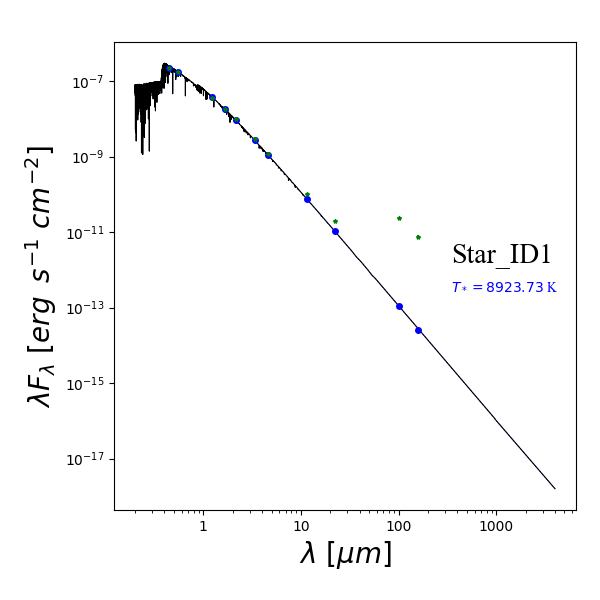

In [9]:
import matplotlib.ticker as mtick

# SET UP AXIS
ax = plt.figure(figsize=(6,6)).add_subplot(111)

# PLOT PHOTOSPHERIC AND LITERATURE DATA
tauA.plot_photosphere(ax, pointsize=4,lcolor='blue',pcolor='blue',lw=.5)
tauA.plot_observedData(ax, pointsize=3,lw=.8)

# ADDITIONAL PLOT STUFF
plt.loglog()
#ax.set_xlim(.2,100)
#ax.set_ylim(1e-13,1e-6)
ax.set_ylabel(r'$\lambda F_{\lambda}\ [erg\,\ s^{-1}\ cm^{-2}] $',fontsize=20, family='sans-serif')
ax.set_xlabel(r'$\lambda\ [\mu m]$', fontsize=20, family='sans-serif')
plt.subplots_adjust(left=.19, right=.96, bottom=.15, top=.93)
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))


ax.annotate(r'{}'.format(tauA.starname), xy=(0.73, 0.53),xycoords='axes fraction',
            fontsize=20, family='Times New Roman')

ax.annotate(r'$T_* = {:.2f}$ K'.format(tauA.StarTemp), xy=(0.73, 0.47),
            xycoords='axes fraction',fontsize=10, family='Times New Roman', color='blue')

plt.show()

# 4. Calculate Excess Flux

In [ ]:
# There's a function that will calculate the excess flux at bands listed in mags4Dust
tauA.calc_excessflux()

In [ ]:
# SET UP AXIS
waveEx = tauA.waveEx
exFlux = tauA.fluxEx
exFlux_e = tauA.efluxEx

ax3 = plt.figure(figsize=(6,6)).add_subplot(111)
ax3.set_title('Excess Flux')
ax3.errorbar(waveEx * twinkle._ANG2MICRON, waveEx * exFlux,
             yerr=waveEx * exFlux_e, fmt='mD',ms=6)
ax3.set_ylabel(r'$\lambda F_{\lambda}\ [erg\,\ s^{-1}\ cm^{-2}] $',fontsize=20, family='sans-serif')
ax3.set_xlabel(r'$\lambda\ [\mu m]$', fontsize=20, family='sans-serif')
ax3.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
plt.show()

## 5.1 Plot New SED With FAR - IR Data

# 6. FIT ONE TO TWO BLACKBODIES

## 6.1 Try fitting 1 blackbody first

In [ ]:
# RESET FULL SPECTRUM - bbdust_flux
tauA.fullspectrum = tauA.StarPhotosphere[1][:]

In [ ]:
# FOR NOW, USING OLD FITTING ROUTINES. WILL EVENTUALLY SWITCH TO PANDAS
# OR SCIPY
import mosaic_tools as mt
ft = mt.FittingTools()

# ==============================================
# INITIAL GUESS
tempdust = 100.
SEDx_ang = tauA.StarPhotosphere[0][:]
bbdust = {}
# ==============================================
# CALCULATE BROADBAND PHOTOMETRY ACROSS IR EXCESS WAVELENGTHS
for i,band in enumerate(tauA.mags4Dust):
    bbdust[band] = stoo.blackbody(SEDx_ang,np.array([tempdust]),1, np.array([band]))[0]

bbdust_flux = np.array(zip(*sorted(bbdust.items()))[1]).flatten()

FluxNorm_dust = np.average(exFlux / bbdust_flux, weights=1. / exFlux_e)

# INITIAL GUESS FOR DUST RADIUS
Rad_dust = np.sqrt(FluxNorm_dust / tauA.su2ea_dust)
print('Initial guess for dust radius: {} AU'.format(Rad_dust))


from scipy.optimize import curve_fit

p0_dust = np.array([tempdust, 30])
popt, pcov = curve_fit(stoo.blackbody, SEDx_ang, exFlux, p0=p0_dust, sigma=exFlux_e,**)

In [ ]:
# FIT BLACKBODY
#p0_dust = np.array([tempdust, Rad_dust])
p0_dust = np.array([tempdust, Rad_dust])
nparams = len(p0_dust)
fa_Dust = {'x': SEDx_ang, 'y': exFlux, 'err': exFlux_e,
           'func': stoo.blackbody, 'su2ea1': tauA.su2ea_dust, 'bands': tauA.mags4Dust,'bulk':True}

#parinfo_dust = [{'value': 0., 'step': 0, 'limits': [0, 0], 'limited': [0, 0], 'fixed': 0} for m in
#                range(nparams)]
parinfo_dust = [{'value': 0., 'step': 0, 'limits': [0, 0], 'limited': [0, 0], 'fixed': 0} for m in
                range(nparams)]

for k in range(nparams): parinfo_dust[k]['value'] = p0_dust[k]
parinfo_dust[0]['relstep'] = .2
parinfo_dust[1]['relstep'] = .2
parinfo_dust[0]['limited'] = [1,1]
parinfo_dust[0]['limits'] = [10,1000]

m_dust = mt.mpfit(ft.deviates_from_model, parinfo=parinfo_dust, functkw=fa_Dust)#,quiet=1)

# from scipy.optimize import curve_fit
# popt, pcov = 


### Print out Chi2 and dust temperatures

In [ ]:
# CALCULATE SINGLE TEMP BLACKBODY FIT
p0_dust,errors = m_dust.params, m_dust.perror
chi2 = m_dust.fnorm/m_dust.dof
print('Chi2={:.2f}, T={:.1f} K , Radius = {:.1f} AU'.format(chi2,*p0_dust)) # , p0_dust, errors 
#p0_dust[0] = p0_dust[0] * 1.2
dust_flux = stoo.blackbody(SEDx_ang, p0_dust,tauA.su2ea_dust)

## 6.2 Plot New SEDs With Fitted Blackbody

In [ ]:
# SAVE THE FULL SPECTRUM IN CASE YOU NEED TO RESET
fullspectrum_0 = tauA.StarPhotosphere[1][:]

In [ ]:
ax5 = plt.figure(figsize=(8,5)).add_subplot(111)

tauA.plot_photosphere(ax5, pointsize=8,lcolor='blue',pcolor='blue',lw=0.5)

tauA.fullspectrum = tauA.StarPhotosphere[1] + dust_flux

plt.plot(SEDx_ang * twinkle._ANG2MICRON, dust_flux * SEDx_ang, 'm-', ls='--',lw=2)

ax5.errorbar(waveEx * twinkle._ANG2MICRON, waveEx * exFlux, 
             yerr=waveEx * exFlux_e, fmt='mD',ms=6)
tauA.plot_observedData(ax5,pointsize=8,lw=1.5)
ax5.set_title('Excess Flux + BLACKBODY')
ax5.set_xlim(.2,300)
ax5.set_ylim(1e-15,1e-6)
ax5.set_ylabel(r'$\lambda F_{\lambda}\ [erg\,\ s^{-1}\ cm^{-2}] $',fontsize=20, family='sans-serif')
ax5.set_xlabel(r'$\lambda\ [\mu m]$', fontsize=20, family='sans-serif')
plt.tight_layout()
ax5.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
ax5.annotate(r'{}'.format(tauA.starname), xy=(0.73, 0.67),xycoords='axes fraction',
            fontsize=20, family='Times New Roman')
ax5.annotate(r'$T_* = {:.2f}$ K'.format(tauA.StarTemp), xy=(0.73, 0.63),
            xycoords='axes fraction',fontsize=10, family='Times New Roman', color='blue')
ax5.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
plt.loglog()

# ===============================================================================================================
ax4 = plt.figure(figsize=(8,5)).add_subplot(111)
ax4.set_title('Excess Flux + BLACKBODY')
ax4.errorbar(waveEx * twinkle._ANG2MICRON, waveEx * exFlux,
             yerr=waveEx * exFlux_e, fmt='mD',ms=6)
ax4.plot(SEDx_ang * twinkle._ANG2MICRON, dust_flux * SEDx_ang,'m-',lw=2)
ax4.set_ylabel(r'$\lambda F_{\lambda}\ [erg\,\ s^{-1}\ cm^{-2}] $',fontsize=20, family='sans-serif')
ax4.set_xlabel(r'$\lambda\ [\mu m]$', fontsize=20, family='sans-serif')
plt.tight_layout()
ax4.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
ax4.set_xlim(8,300)
ax4.set_ylim(1e-13,1e-9)

plt.loglog()
plt.show()

## 6.3 Fitting 2 blackbody's to excess flux

In [ ]:
# FOR NOW, USING OLD FITTING ROUTINES. WILL EVENTUALLY SWITCH TO PANDAS
# OR SCIPY

# ==============================================
# INITIAL GUESS
td1, td2, td3 = 500, 100., 40
SEDx_ang = tauA.StarPhotosphere[0]
bbdust = {}
# ==============================================
# CALCULATE BROADBAND PHOTOMETRY ACROSS IR EXCESS WAVELENGTHS
for band in tauA.mags4Dust:
    bbdust[band] = stoo.NBlackBody(SEDx_ang,np.array([td1,1,td2,1,td3,1]),1, np.array([band]))[0]

bbdust_flux = np.array(zip(*sorted(bbdust.items()))[1]).flatten()

FluxNorm_dust = np.average(exFlux / bbdust_flux,
                           weights=1. / exFlux_e)

# INITIAL GUESS FOR DUST RADIUS
Rad_dust = np.sqrt(FluxNorm_dust / tauA.su2ea_dust)
print(Rad_dust)

In [ ]:
# FIT BLACKBODY
p0_dust = np.array([td1,Rad_dust,td2, Rad_dust*2,td3,Rad_dust**3])
nparams = len(p0_dust)
# fa_Dust = {'x': SEDx_ang, 'y': exFlux, 'err': exFlux_e,
#            'func': stoo.doubleBB, 'su2ea1': tauA.su2ea_dust, 'bands': tauA.mags4Dust,'bulk':True}
fa_Dust = {'x': SEDx_ang, 'y': exFlux, 'err': exFlux_e,
           'func': stoo.NBlackBody, 'su2ea1': tauA.su2ea_dust, 'bands': tauA.mags4Dust,'bulk':True}

parinfo_dust = [{'value': 0., 'relstep': 0, 'limits': [0, 0], 'limited': [0, 0], 'fixed': 0} 
                for m in range(nparams)]

for k in range(nparams): parinfo_dust[k]['value'] = p0_dust[k]
parinfo_dust[0]['relstep'] = 0.3
parinfo_dust[1]['relstep'] = 0.2
parinfo_dust[0]['limited'] = [1,1]
parinfo_dust[0]['limits'] = [200,1000]

parinfo_dust[2]['relstep'] = 0.3
parinfo_dust[3]['relstep'] = 0.2
parinfo_dust[2]['limited'] = [1,1]
parinfo_dust[2]['limits'] = [50,100]

parinfo_dust[4]['relstep'] = 0.3
parinfo_dust[5]['relstep'] = 0.2
parinfo_dust[4]['limited'] = [1,1]
parinfo_dust[4]['limits'] = [2,80]


m_dust = mt.mpfit(ft.deviates_from_model, parinfo=parinfo_dust, functkw=fa_Dust)#,quiet=1)


### Print out Chi2 and dust temperatures

In [ ]:
# CALCULATE SINGLE TEMP BLACKBODY FIT
p0_dust,errors = m_dust.params, m_dust.perror
#chi2 = m_dust.fnorm/m_dust.dof
print('Chi2={:.2f}'.format(chi2))# , p0_dust, errors 
print(p0_dust)
dust_flux = stoo.NBlackBody(SEDx_ang, p0_dust,tauA.su2ea_dust)

## 6.2 Plot New SEDs With Fitted Blackbody

In [ ]:
# RESET FULL SPECTRUM - 
tauA.resetFullSpectrum()

In [ ]:
ax5 = plt.figure(figsize=(8,5)).add_subplot(111)
tauA.plot_photosphere(ax5, pointsize=8,lcolor='blue',pcolor='blue',lw=0.5)
tauA.fullspectrum = tauA.StarPhotosphere[1] + dust_flux

plt.plot(SEDx_ang * twinkle._ANG2MICRON, dust_flux * SEDx_ang, 'm-', ls='--',lw=2)
ax5.errorbar(waveEx * twinkle._ANG2MICRON, waveEx * exFlux, 
             yerr=waveEx * exFlux_e, fmt='mD',ms=6)
tauA.plot_observedData(ax5,pointsize=8,lw=1.5)
ax5.set_title('Full Spectrum')
ax5.set_xlim(.2,300)
ax5.set_ylim(1e-15,1e-6)
ax5.set_ylabel(r'$\lambda F_{\lambda}\ [erg\,\ s^{-1}\ cm^{-2}] $',fontsize=20, family='sans-serif')
ax5.set_xlabel(r'$\lambda\ [\mu m]$', fontsize=20, family='sans-serif')
plt.subplots_adjust(left=.19, right=.96, bottom=.15, top=.93)
ax5.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
ax5.annotate(r'{}'.format(tauA.starname), xy=(0.73, 0.67),xycoords='axes fraction',
            fontsize=20, family='Times New Roman')
ax5.annotate(r'$T_* = {:.2f}$ K'.format(tauA.StarTemp), xy=(0.73, 0.63),
            xycoords='axes fraction',fontsize=10, family='Times New Roman', color='blue')
ax5.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
plt.loglog()

# ===============================================================================================================
ax4 = plt.figure(figsize=(8,5)).add_subplot(111)
ax4.set_title('Excess Flux')
ax4.errorbar(waveEx * twinkle._ANG2MICRON, waveEx * exFlux,
             yerr=waveEx * exFlux_e, fmt='mD',ms=6)
ax4.plot(SEDx_ang * twinkle._ANG2MICRON, dust_flux * SEDx_ang,'m-',lw=2)
ax4.set_ylabel(r'$\lambda F_{\lambda}\ [erg\,\ s^{-1}\ cm^{-2}] $',fontsize=20, family='sans-serif')
ax4.set_xlabel(r'$\lambda\ [\mu m]$', fontsize=20, family='sans-serif')
plt.subplots_adjust(left=.19, right=.96, bottom=.15, top=.93)
ax4.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
ax4.set_xlim(8,300)
ax4.set_ylim(1e-13,1e-9)

plt.loglog()
plt.show()